In [1]:
from nbodykit.lab import cosmology

cosmo = cosmology.Cosmology()
print("original sigma8 = %.4f" % cosmo.sigma8)

original sigma8 = 0.8380


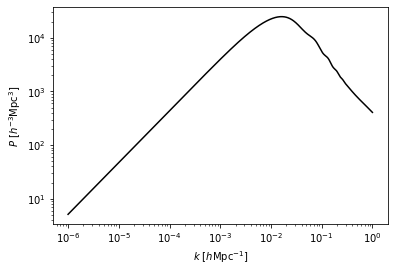

In [118]:
import matplotlib.pyplot as plt
import numpy as np

c = cosmology.Planck15
Plin = cosmology.LinearPower(c, redshift=0., transfer='CLASS')

Plin = cosmology.HalofitPower(c, redshift=0)

k = np.logspace(-6, 0, 1000)
plt.loglog(k, Plin(k), c='k')

plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.show()

In [119]:
def window(x):
    y = (3/x**3)*(np.sin(x)-x*np.cos(x))
    return y

In [120]:
h = 67.74
omega = 0.307
n_boxes = 30
L_box_sizes = 1/np.linspace(1E-5,2E-2,n_boxes)
sigma_vel = np.zeros(n_boxes)
for i in range(n_boxes):
    L_box = L_box_sizes[i]
    k_box = 2.0*np.pi/L_box
    plink = Plin(k)
    ii = k<k_box
    new_plink = plink.copy()
    new_plink[ii] = 0
    W2 = window(k)**2
    sigma_minus_1 = np.sqrt(np.trapz(new_plink*W2, k)/(2.0*np.pi**2))
    sigma_0 = np.sqrt(np.trapz(new_plink*W2*k*k, k)/(2.0*np.pi**2))
    sigma_1 = np.sqrt(np.trapz(new_plink*W2*k*k*k*k, k)/(2.0*np.pi**2))
    sigma_vel[i] = h * omega**0.6 * (sigma_minus_1) * np.sqrt(1.0 - sigma_0**4/(sigma_1**2 * sigma_minus_1**2))
    print(np.sqrt(1 - sigma_0**4/(sigma_1**2 * sigma_minus_1**2)))
print(79.39/sigma_vel[-1])

0.9129501375053649
0.9116016528271484
0.908283527906778
0.9037345782632576
0.8985458784302477
0.8922997529754969
0.8861756561685287
0.8800271057000792
0.8743393283780625
0.8680609443971038
0.861945092044178
0.8569683311807865
0.8506293440640257
0.8446160158706296
0.8391015184865144
0.8330603585305362
0.8264563165260216
0.8207745456413553
0.8147749054861945
0.8085155132592767
0.8020648945227554
0.7971368854593026
0.7904669062922002
0.7853774282936725
0.7801779574489104
0.7748162520515346
0.7692281051052571
0.7653444218524402
0.7592411856338386
0.7527790406046031
0.4811594057538262


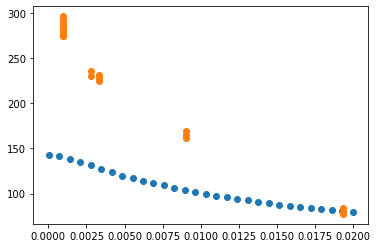

In [121]:
sigma_vel = np.sqrt(sigma_vel**2 + 100**2)
sigma_vel = sigma_vel * 79.39/sigma_vel[-1]



v = np.array([79.39,77.33,84.09,161.47, 164.65, 169.06, 225.01, 228.01, 231.17,
     236.16, 230.26, 287.90, 280.57, 283.48, 288.06, 296.87 , 293.44,
     274.61, 279.81 , 280.67, 279.11, 281.28, 285.81, 285.14 , 286.30, 
     289.23, 278.45, 277.81, 274.83, 277.62, 277.66])
len(v)
L = np.array([51.7, 51.7, 51.7, 110.7, 110.7, 110.7, 302.6, 302.6, 302.6, 
             357.14, 357.14, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62,
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62])
x = 1/L
y = v


plt.scatter(1/L_box_sizes, sigma_vel)
plt.scatter(1/L, y)

In [84]:
integral[0]

307.6632970726389

In [61]:
79.39/integral[-1]

1.0